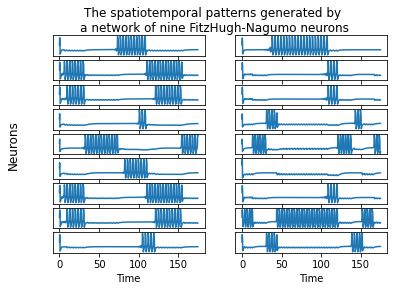

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 15 10:31:57 2021

@author: Sidharth Adithyan
"""

import numpy as np
import matplotlib.pyplot as plt


def f(x,y,z,s,t): # define main function
    toh1=0.08
    meu=-1.5
    return ((x-((1/3)*(x**3)))-(y)-(z*(x-meu))+0.35+s)/toh1

def g(x,y,t): # define the function than brings back the potential (K+)
    b=0.8
    a=0.7
    return (x-(b*y)+a)

def h(z,G,toh2,t): # define the inhibitory fucntion
    return (G-z)/(toh2)

neuNo=9 # define number of neurons
epsilon = 0.01 # define timestep

# define an array for t
t = np.arange(0,175,epsilon) 
lenT=len(t) 


#synaptic connection matrix
G=np. zeros((9, 1)) #vector containg step fuction values
G1=np. zeros((9, 1)) #vector we get after doting the step fuction with connection matrix
k= np. zeros((9, 9)) #connection matrix
ky=[0, 4, 1, 1, 3, 4, 5, 1, 2, 4, 6, 4, 7, 4, 7, 7, 8]
kx=[4, 1, 0, 3, 4, 1, 4, 5, 5, 2, 3, 6, 3, 7, 5, 8, 4]
for i in range(0,len(kx)): # populating the conections
    k[kx[i],ky[i]]=2


#external stimulus
s=np.zeros((2,9))
s[0,:]=[0.1, 0.15, 0, 0, 0.15, 0.1, 0, 0, 0]
s[1,:]=[0.01, 0.03, 0.05, 0.04, 0.06, 0.02, 0.03, 0.05, 0.04]

#Define toh2 for two stimulus
toh2=[3.1,4.1]




#holder for ploting
holder=np.zeros((2,neuNo,lenT))

#loops over both stimulus
for d in range(0,2):
    
    x = np.zeros((neuNo,lenT)) # define an array for x
    y = np.zeros((neuNo,lenT)) # define an array for y
    z = np.zeros((neuNo,lenT)) # define an array for z 
    
    # set initial condition
    for v in range(0,neuNo):
        x[v,0]= -1.2 
        y[v,0]= -0.62
        z[v,0]= 0
        
    # Euler Integration Step
    for i in range(0,t.shape[0]):
        for j in range (0,neuNo): #determining the step fuction values
            if x[j,i-1]>0:
                G[j]=1
            else:
                G[j]=0
        G1=np.dot(k,G)
        for j in range (0,neuNo): # integration
            x[j,i] = epsilon*f(x[j,i-1],y[j,i-1],z[j,i-1],s[d,j],t[i-1])+x[j,i-1]
            y[j,i] = epsilon*g(x[j,i-1],y[j,i-1],t[i-1])+y[j,i-1]
            z[j,i] = epsilon*h(z[j,i-1],G1[j],toh2[d],t[i-1])+z[j,i-1]
            
        #Adds the final x to holder
        holder[d,:,:]=x

# plotting
fig, axs = plt.subplots(9,2)
fig.suptitle('The spatiotemporal patterns generated by '+'\n'+'a network of nine FitzHugh-Nagumo neurons')

for d in range(0,2):
    x=holder[d,:,:]
    for j in range (0,neuNo):
        axs[8-j,1-d].plot(t[::5],x[j,::5],label="x"+str(j+1))
        axs[8-j,1-d].axes.yaxis.set_visible(False)
       #plt.plot(t[::5],y[j,::5],label="y")
       #plt.plot(t[::5],z[j,::5],label="z")
       #plt.xlabel("t")
       #plt.ylabel("x")
       #plt.legend()
    
#lables
for ax in axs.flat:
    ax.set(xlabel='Time')
fig.supylabel('Neurons')

for ax in axs.flat:
    ax.label_outer()
plt.show()